# Credit Card Fraud Detection

In [1]:
# importing packages
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from xgboost import XGBClassifier
import xgboost
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Read the CSV into DataFrame

In [2]:
# Loading data
file_path = Path('./Data/data_2019.csv')
df = pd.read_csv(file_path)
df.head()

,User,Card,Year,Month,Day,Hour,Minutes,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,MCC,isFraud
0,1,1,2019,1,1,13,5,51.94,Online Transaction,5531,ONLINE,UNKNOWN,4814,No
1,1,1,2019,1,3,13,57,18.85,Chip Transaction,1023,Corona,NY,7538,No
2,1,1,2019,1,4,18,43,62.36,Chip Transaction,1710,Little Neck,NY,5812,No
3,1,1,2019,1,5,15,33,230.07,Chip Transaction,5840,Little Neck,NY,5300,No
4,1,1,2019,1,5,18,57,63.75,Chip Transaction,895,Little Neck,NY,5814,No


In [3]:
# Shape of the data
df.shape

(272118, 14)

In [4]:
# Encode all the categorical data
categorical_cols = ['Use Chip', 'Merchant City', 'Merchant State', 'isFraud']
encoders = {}

for i in categorical_cols:
    encoders[i] = LabelEncoder()
    df[i] = encoders[i].fit_transform(df[i])

df.head()

,User,Card,Year,Month,Day,Hour,Minutes,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,MCC,isFraud
0,1,1,2019,1,1,13,5,51.94,1,5531,2152,74,4814,0
1,1,1,2019,1,3,13,57,18.85,0,1023,637,51,7538,0
2,1,1,2019,1,4,18,43,62.36,0,1710,1633,51,5812,0
3,1,1,2019,1,5,15,33,230.07,0,5840,1633,51,5300,0
4,1,1,2019,1,5,18,57,63.75,0,895,1633,51,5814,0


In [5]:
# Year column does not add any new info so dropping
df.drop(columns=['Year', 'User'], inplace=True)
df.head()

,Card,Month,Day,Hour,Minutes,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,MCC,isFraud
0,1,1,1,13,5,51.94,1,5531,2152,74,4814,0
1,1,1,3,13,57,18.85,0,1023,637,51,7538,0
2,1,1,4,18,43,62.36,0,1710,1633,51,5812,0
3,1,1,5,15,33,230.07,0,5840,1633,51,5300,0
4,1,1,5,18,57,63.75,0,895,1633,51,5814,0


# Split the Data into Training and Testing

In [6]:
# Features (X) and Targets (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [7]:
# Checking the balance of the Target values
y.value_counts()

0    270031
1      2087
Name: isFraud, dtype: int64

This is a highly imbalanced data set

In [8]:
# Creating Train and Test split for X and y
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.4,
                                                    shuffle=True, 
                                                    random_state=1)

# Data Pre-Processing

In [9]:
# Creating standard scaler instance and fit the training data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [10]:
# Scaling Train and Test data
X_train = scaler.transform(X_train)
X_test =  scaler.transform(X_test)

# Easy Ensemble Classifier

In [11]:
# Train the IF classifier
eec_clf = EasyEnsembleClassifier(random_state=1)
eec_clf.fit(X_train, y_train)

EasyEnsembleClassifier(random_state=1)

In [12]:
# Predict and Evaluate the results
y_pred = eec_clf.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.9994769583973635

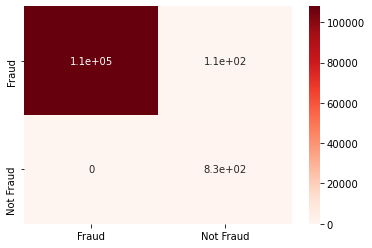

In [13]:
# Confusion metrics
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['Fraud', 'Not Fraud'], columns=['Fraud', 'Not Fraud'])
sns.heatmap(cm, annot=True, cmap='Reds')

In [14]:
# Imbalanced Classification Report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00    108022
          1       0.88      1.00      1.00      0.94      1.00      1.00       826

avg / total       1.00      1.00      1.00      1.00      1.00      1.00    108848



In [15]:
# ROC-AUC score
roc_auc_score(y_test, y_pred)

0.9994769583973635

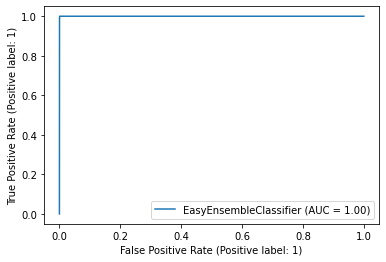

In [16]:
# plotting ROC Curve
plot_roc_curve(eec_clf, X_test, y_test)

# Random Forest Classifier

In [17]:
# Train the RF classifier
rf_clf = RandomForestClassifier(n_estimators=100, 
                                random_state=1)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [18]:
# Predict and Evaluate the results
y_pred = rf_clf.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.9981145890692251

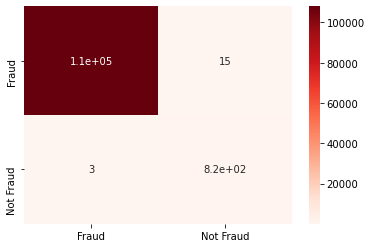

In [19]:
# Confusion metrics
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['Fraud', 'Not Fraud'], columns=['Fraud', 'Not Fraud'])
sns.heatmap(cm, annot=True, cmap='Reds')

In [20]:
# Imbalanced Classification Report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00    108022
          1       0.98      1.00      1.00      0.99      1.00      1.00       826

avg / total       1.00      1.00      1.00      1.00      1.00      1.00    108848



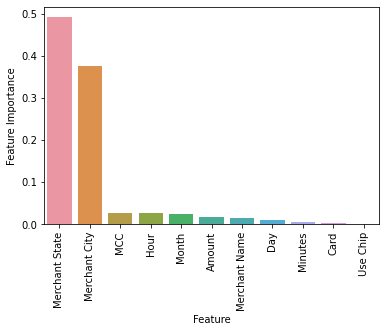

In [21]:
# Feature Importance
feature_list = {i:j for i, j in zip(rf_clf.feature_importances_, X.columns)}
fi = pd.DataFrame(sorted(feature_list.items(), reverse=True), columns=['Feature Importance', 'Feature'])
plot = sns.barplot(x='Feature', y='Feature Importance', data=fi)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90);

In [22]:
# ROC-AUC score
roc_auc_score(y_test, y_pred)

0.9981145890692251

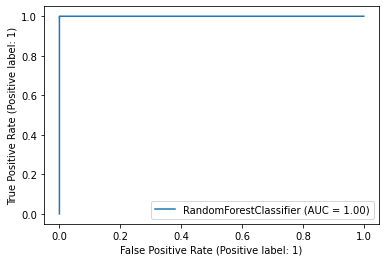

In [23]:
# plotting ROC Curve
plot_roc_curve(rf_clf, X_test, y_test)

# XGBoost Classifier

In [24]:
# Train the XGBoost classifier
xgb_clf = XGBClassifier(random_state=1, 
                        learning_rate=0.35, 
                        eval_metric='mlogloss')

xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.35, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
# Predict and Evaluate the results
y_pred = xgb_clf.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.9957164249969168

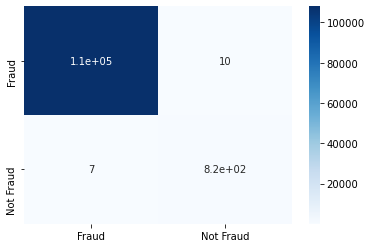

In [26]:
# Confusion metrics
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['Fraud', 'Not Fraud'], columns=['Fraud', 'Not Fraud'])
sns.heatmap(cm, annot=True, cmap='Blues')

In [27]:
# Imbalanced Classification Report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.99      1.00      1.00      0.99    108022
          1       0.99      0.99      1.00      0.99      1.00      0.99       826

avg / total       1.00      1.00      0.99      1.00      1.00      0.99    108848



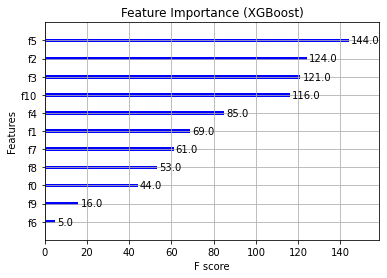

In [28]:
xgboost.plot_importance(xgb_clf, title="Feature Importance (XGBoost)", color='Blue')

In [29]:
# ROC-AUC score
roc_auc_score(y_test, y_pred)

0.9957164249969168

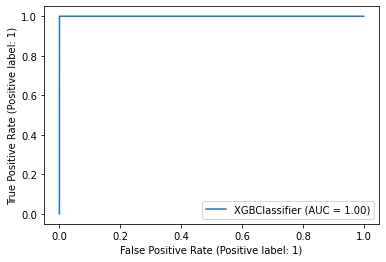

In [30]:
# plotting ROC Curve
plot_roc_curve(xgb_clf, X_test, y_test)